NameError: name 'unit_length_reduced' is not defined

E:\tools\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 22522 (\N{CJK UNIFIED IDEOGRAPH-57FA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\tools\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20110 (\N{CJK UNIFIED IDEOGRAPH-4E8E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\tools\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 28857 (\N{CJK UNIFIED IDEOGRAPH-70B9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\tools\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 32988 (\N{CJK UNIFIED IDEOGRAPH-80DC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\tools\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21033 (\N{CJK UNIFIED IDEOGRAPH-5229}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\tools\Anaconda3\l

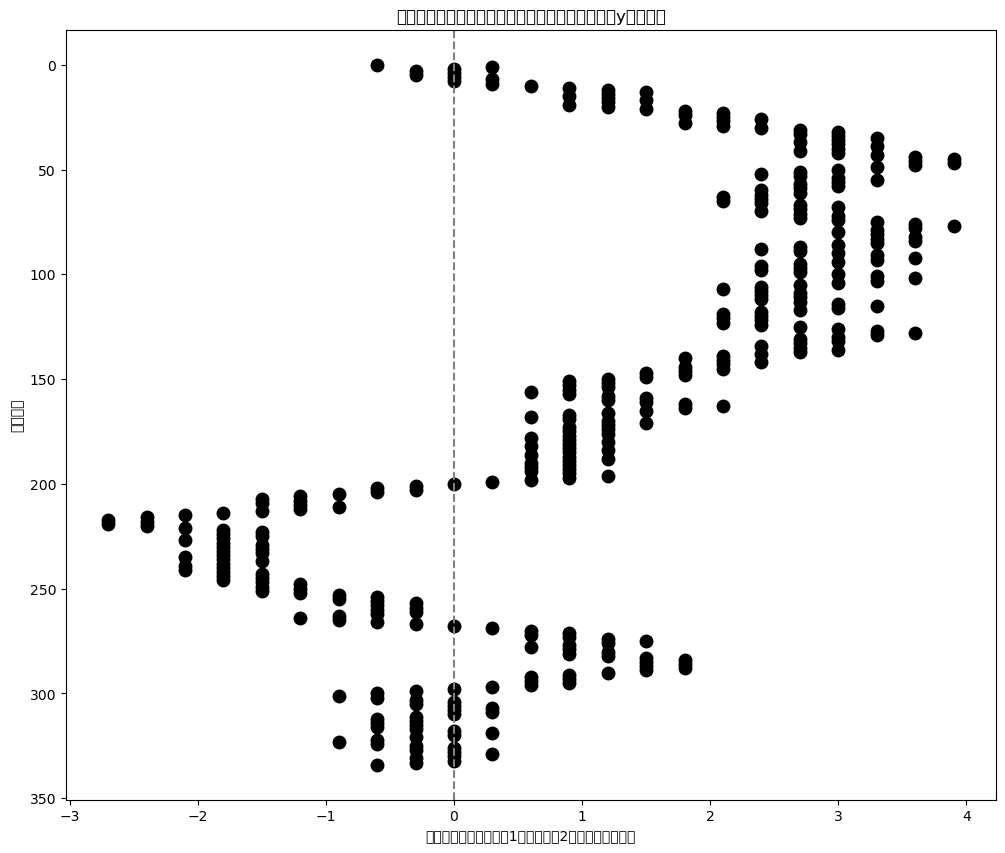

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# 假定已经加载了数据到data DataFrame中
data = pd.read_excel('决赛数据.xlsx')

# 设置点的直径
point_diameter = 0.3  # 假设黑点直径为0.1单位
unit_length = point_diameter  # 一个单位的长度设置为黑点直径的两倍

data['point_no_numeric'] = pd.to_numeric(data['point_no'], errors='coerce').fillna(0)

# 根据 point_victor 更新位置，考虑到缩小的单位长度
point_positions_reduced = []
current_position_reduced = 0

for victor in data['point_victor']:
    if victor == 1:
        current_position_reduced -= unit_length  # 向左移动缩小后的单位长度
    elif victor == 2:
        current_position_reduced += unit_length  # 向右移动缩小后的单位长度
    point_positions_reduced.append(current_position_reduced)

# 重新绘制图表，考虑到调整后的单位长度和y轴的位置
plt.figure(figsize=(12, 10))

# 绘制得分点，使用缩小后的单位长度
plt.scatter(point_positions_reduced, data['point_no_numeric'], color='black', s=(point_diameter * 30)**2, marker='o')

# 添加中轴线（y轴）
plt.axvline(x=0, color='grey', linestyle='--')  # 中轴线作为y轴

plt.xlabel('得分点位置（左：玩家1，右：玩家2，单位长度缩小）')
plt.ylabel('球点编号')
plt.title('基于点胜利者的得分动态可视化（调整单位长度和y轴位置）')
plt.gca().invert_yaxis()  # 倒置y轴，使得比赛开始的球点在上方

# 设置x轴的范围以确保所有点和y轴都可见
plt.xlim(min(point_positions_reduced) - unit_length_reduced, max(point_positions_reduced) + unit_length_reduced)

plt.show()
